In [11]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)


In [12]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/burst_index/post_processed/df_cell_class_with_burst.csv')


# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]


data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))


data = data[data$n_spikes>=100,]

print(summary(data))



       X          Unnamed..0    Unnamed..0.1  Unnamed..0.1.1
 Min.   :   0   Min.   :   0   Min.   :   0   Min.   :   0  
 1st Qu.:2288   1st Qu.:2288   1st Qu.:2288   1st Qu.:2288  
 Median :4456   Median :4456   Median :4456   Median :4456  
 Mean   :4434   Mean   :4434   Mean   :4434   Mean   :4434  
 3rd Qu.:6614   3rd Qu.:6614   3rd Qu.:6614   3rd Qu.:6614  
 Max.   :8781   Max.   :8781   Max.   :8781   Max.   :8781  
                                                            
                    session        tetrode          cell       
 LEM3124_S20190302163218: 134   TT6.mat:1191   Min.   :  0.00  
 LEM3206_S20190719140644: 119   TT4.mat:1029   1st Qu.:  3.00  
 LEM3206_S20190718143924: 118   TT7.mat:1015   Median :  6.00  
 LEM3206_S20190717140525: 117   TT1.mat: 984   Mean   : 23.63  
 LEM3206_S20190720132154: 113   TT2.mat: 966   3rd Qu.: 11.00  
 LEM3216_S20190718101925: 113   TT3.mat: 911   Max.   :347.00  
 (Other)                :7884   (Other):2502                   


# burst_index

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,20844.73,20866.68,-10418.37,20836.73,NA,NA,NA
m1,5,20845.74,20873.18,-10417.87,20835.74,0.9901314,1,0.3197103


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: burst_index_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
 20845.7  20873.2 -10417.9  20835.7     1780 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9047 -0.7022  0.2038  0.7312  2.7928 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 1567     39.59   
 rat         (Intercept) 1239     35.21   
 Residual                6307     79.42   
Number of obs: 1785, groups:  session:rat, 91; rat, 10

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   183.76      17.92  13.10  10.253 1.25e-07 ***
grouppae      -26.88      25.94  10.13  -1.036    0.324    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.691

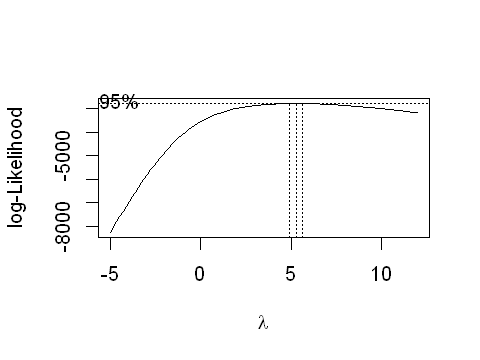

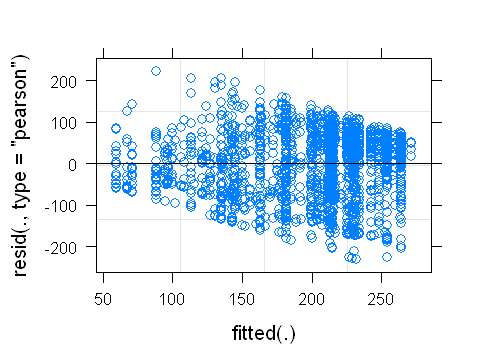

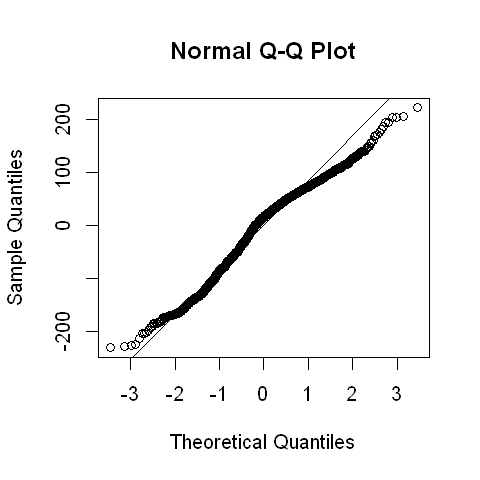

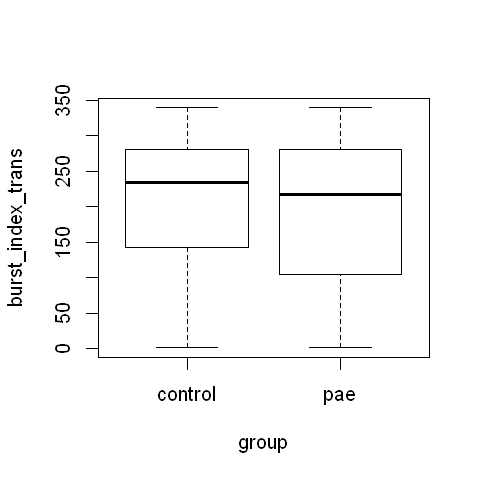

In [13]:
options(repr.plot.width = 4, repr.plot.height = 3)

data$burst_index_trans = (data$burst_index+2)

m1 = lm(burst_index_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,12,0.5))
lambda = result$x[which.max(result$y)]
data$burst_index_trans = data$burst_index_trans^lambda


m1 = lmer(burst_index_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(burst_index_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(burst_index_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,29022.01,29046.82,-14507.00,29014.01,NA,NA,NA
m1,5,29022.65,29053.66,-14506.32,29012.65,1.360388,1,0.2434702


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: burst_index_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
 29022.6  29053.7 -14506.3  29012.6     3648 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.72504 -0.73688  0.06008  0.78205  2.02216 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept)  15.704   3.963  
 rat         (Intercept)   5.311   2.305  
 Residual                157.457  12.548  
Number of obs: 3653, groups:  session:rat, 126; rat, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   27.316      1.377  9.756  19.836 3.28e-09 ***
grouppae       2.430      2.002  7.572   1.214    0.261    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.688

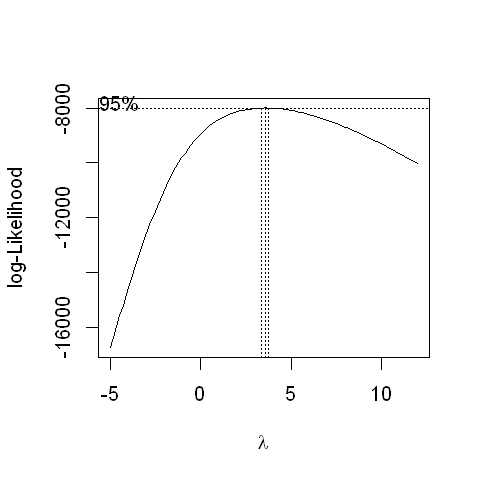

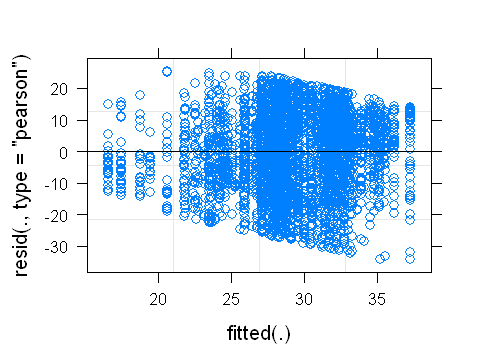

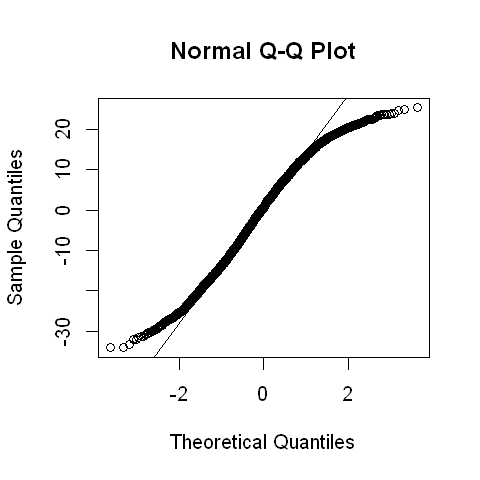

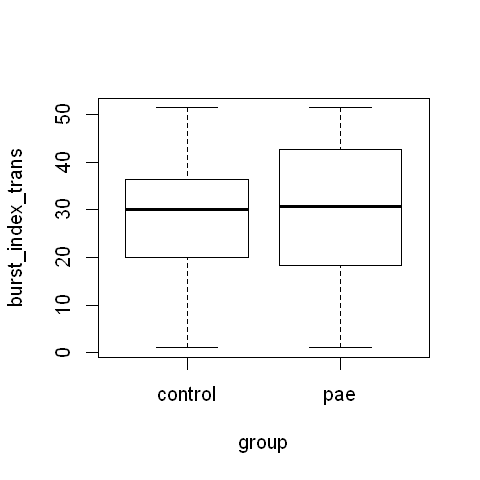

In [14]:
data$burst_index_trans = (data$burst_index+2)

m1 = lm(burst_index_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,12,0.5))
lambda = result$x[which.max(result$y)]
data$burst_index_trans = data$burst_index_trans^lambda


m1 = lmer(burst_index_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(burst_index_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(burst_index_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,5338.476,5353.477,-2666.238,5332.476,NA,NA,NA
m1,4,5339.335,5359.336,-2665.667,5331.335,1.141196,1,0.2853998


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: burst_index_trans ~ group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  5339.3   5359.3  -2665.7   5331.3     1093 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3591 -0.6226 -0.0551  0.6980  2.3619 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 1.046    1.023   
 Residual             7.036    2.653   
Number of obs: 1097, groups:  session, 85

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   7.8218     0.2932 82.8150  26.677   <2e-16 ***
grouppae      0.3657     0.3422 81.6916   1.069    0.288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.857

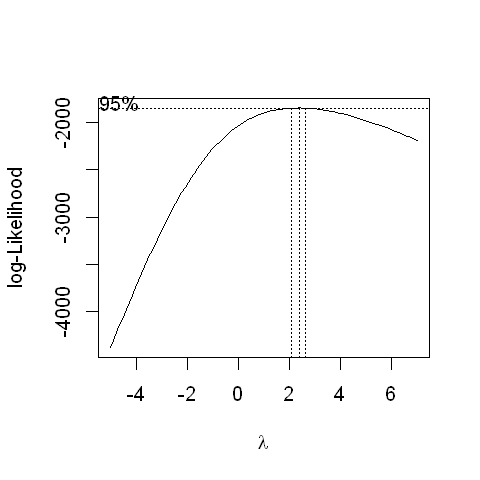

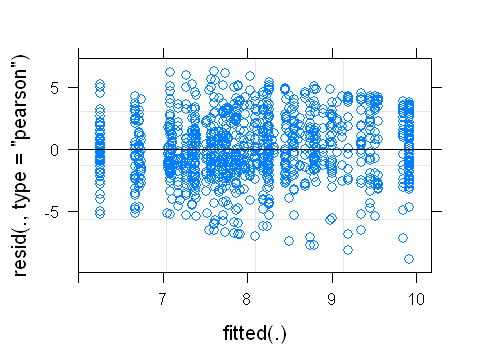

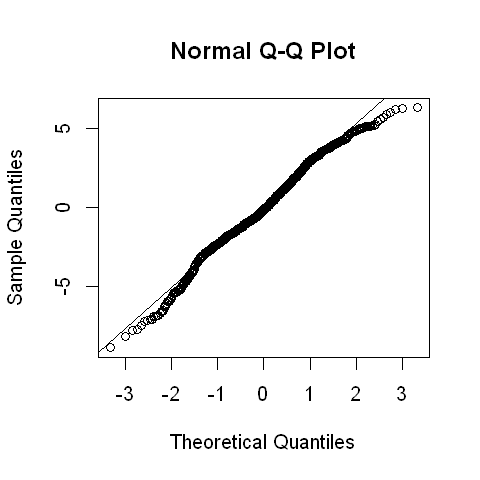

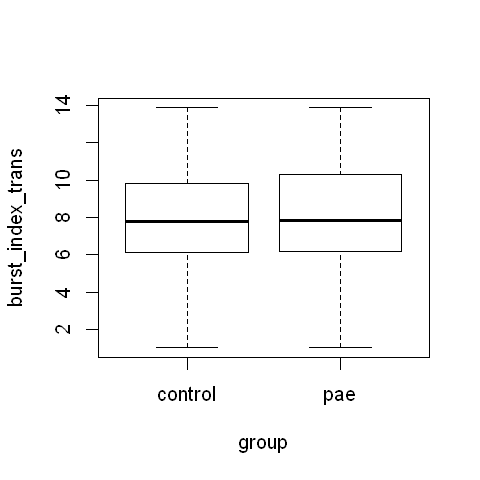

In [15]:
data$burst_index_trans = (data$burst_index+2)

m1 = lm(burst_index_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,7,0.5))
lambda = result$x[which.max(result$y)]
data$burst_index_trans = data$burst_index_trans^lambda


m1 = lmer(burst_index_trans ~ group + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(burst_index_trans ~ 1 + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(burst_index_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,12408.30,12430.72,-6200.148,12400.30,NA,NA,NA
m1,5,12407.55,12435.57,-6198.773,12397.55,2.750329,1,0.09723443


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: burst_index_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
 12407.5  12435.6  -6198.8  12397.5     2003 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.77084 -0.63254 -0.01451  0.72599  2.59304 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept)  1.260   1.122   
 rat         (Intercept)  1.562   1.250   
 Residual                27.042   5.200   
Number of obs: 2008, groups:  session:rat, 120; rat, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  11.6488     0.7067  8.6976   16.48 7.34e-08 ***
grouppae      1.8684     1.0323  6.8426    1.81    0.114    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.685

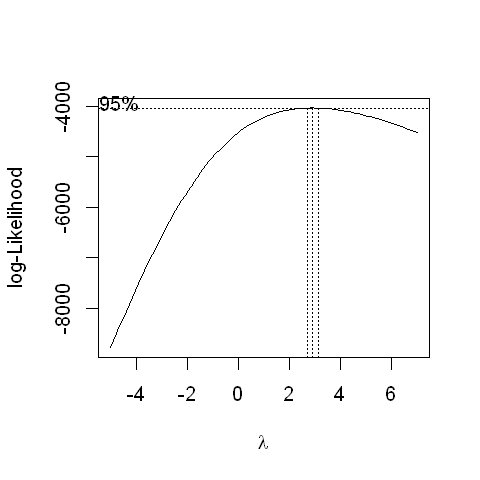

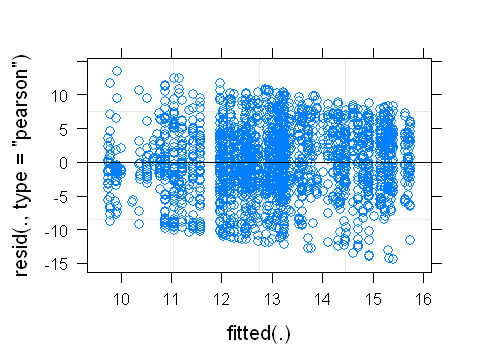

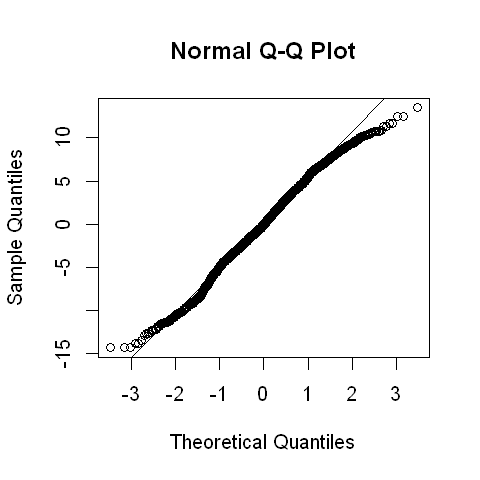

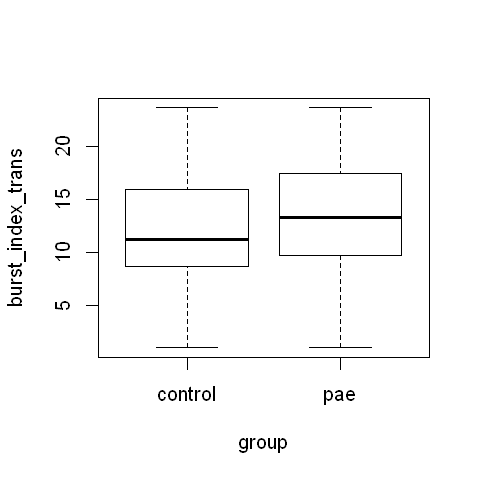

In [16]:
data$burst_index_trans = (data$burst_index+2)

m1 = lm(burst_index_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,7,0.5))
lambda = result$x[which.max(result$y)]
data$burst_index_trans = data$burst_index_trans^lambda


m1 = lmer(burst_index_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(burst_index_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(burst_index_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])


# CV2

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-6303.871,-6281.898,3155.936,-6311.871,NA,NA,NA
m1,5,-6302.152,-6274.685,3156.076,-6312.152,0.2808684,1,0.5961326


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: cv_2_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
 -6302.2  -6274.7   3156.1  -6312.2     1791 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7551 -0.6511 -0.0131  0.6636  3.3174 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 2.085e-04 0.014441
 rat         (Intercept) 9.147e-05 0.009564
 Residual                1.641e-03 0.040515
Number of obs: 1796, groups:  session:rat, 91; rat, 10

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.734983   0.005626  8.650485 130.648 1.47e-15 ***
grouppae    -0.004209   0.007823  6.070818  -0.538     0.61    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.719

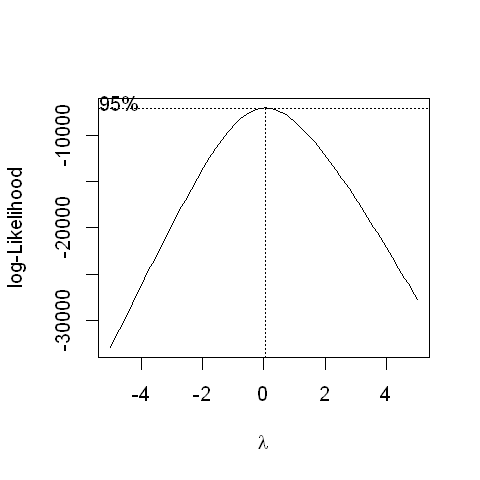

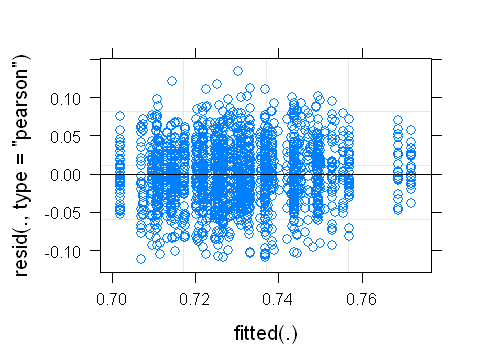

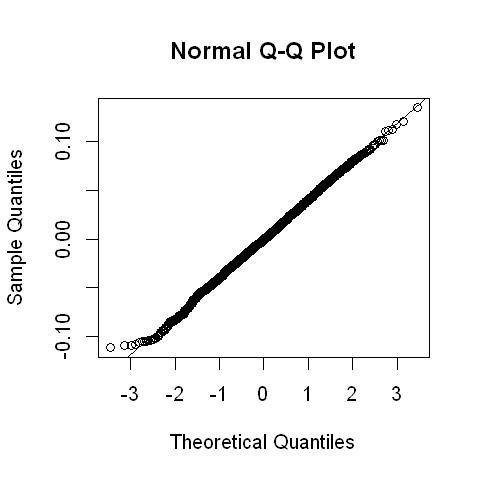

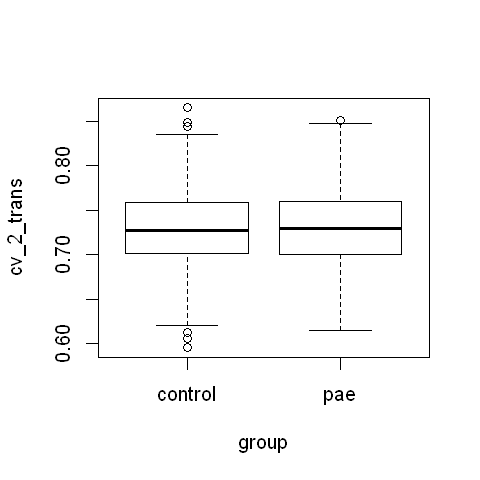

In [17]:
m1 = lm(cv_2 ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$cv_2_trans = data$cv_2^lambda

m1 = lmer(cv_2_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(cv_2_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(cv_2_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-7896.071,-7871.240,3952.035,-7904.071,NA,NA,NA
m1,5,-7894.074,-7863.035,3952.037,-7904.074,0.003089071,1,0.9556769


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: cv_2_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
 -7894.1  -7863.0   3952.0  -7904.1     3664 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7941 -0.7003 -0.0084  0.6980  3.4412 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.001220 0.03493 
 rat         (Intercept) 0.001306 0.03613 
 Residual                0.006373 0.07983 
Number of obs: 3669, groups:  session:rat, 126; rat, 8

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  1.383363   0.018230  8.213967  75.885 5.52e-13 ***
grouppae    -0.001575   0.028122  6.994860  -0.056    0.957    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.648

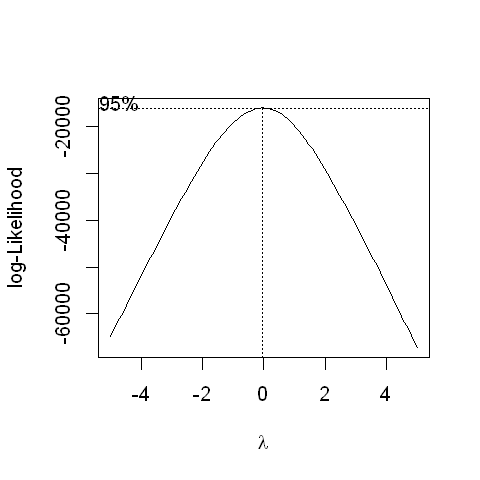

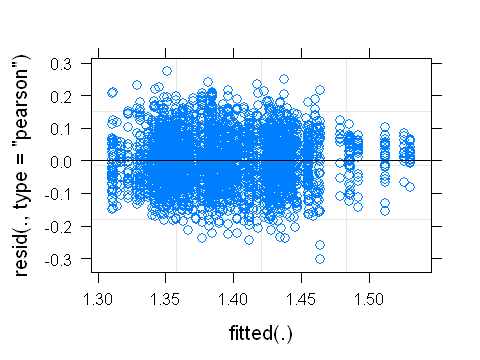

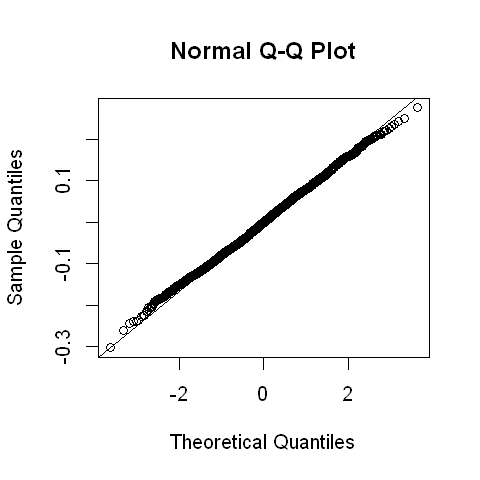

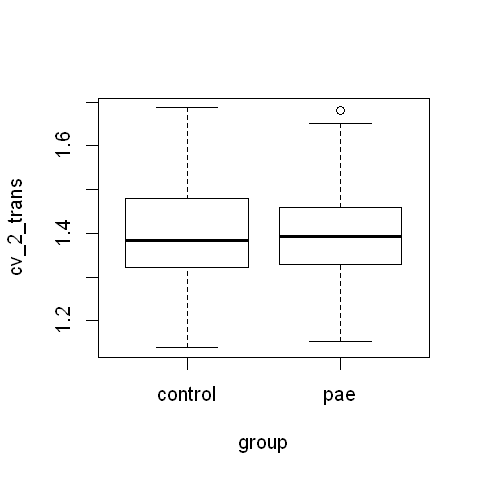

In [18]:
m1 = lm(cv_2 ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$cv_2_trans = data$cv_2^lambda

m1 = lmer(cv_2_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(cv_2_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(cv_2_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-3676.193,-3656.149,1842.097,-3684.193,NA,NA,NA
m1,5,-3675.901,-3650.845,1842.951,-3685.901,1.707915,1,0.1912561


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: cv_2_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
 -3675.9  -3650.8   1843.0  -3685.9     1104 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1967 -0.6637  0.0319  0.7008  2.8725 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0001713 0.01309 
 rat         (Intercept) 0.0001849 0.01360 
 Residual                0.0019809 0.04451 
Number of obs: 1109, groups:  session:rat, 85; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 0.711542   0.007612 6.768051  93.478 8.75e-12 ***
grouppae    0.015974   0.010532 4.764172   1.517    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.723

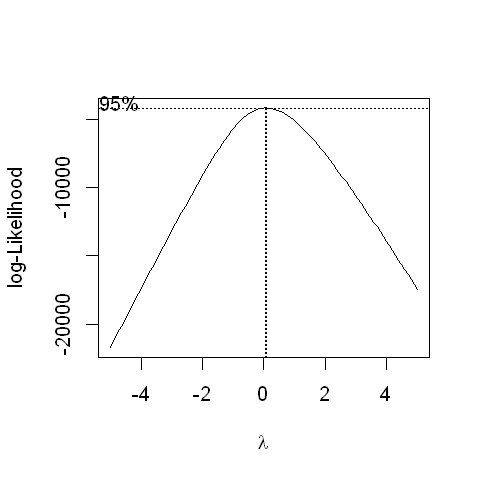

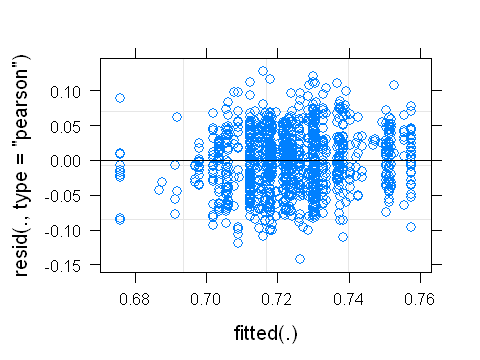

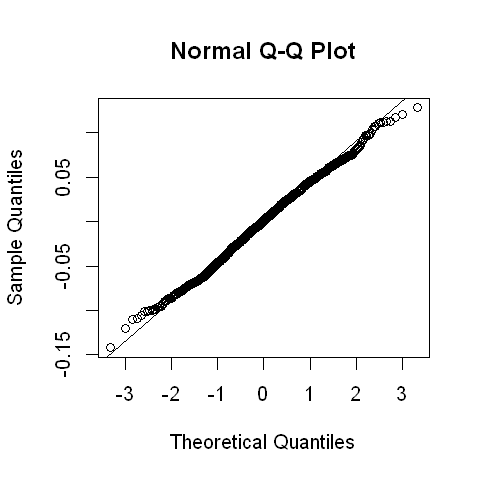

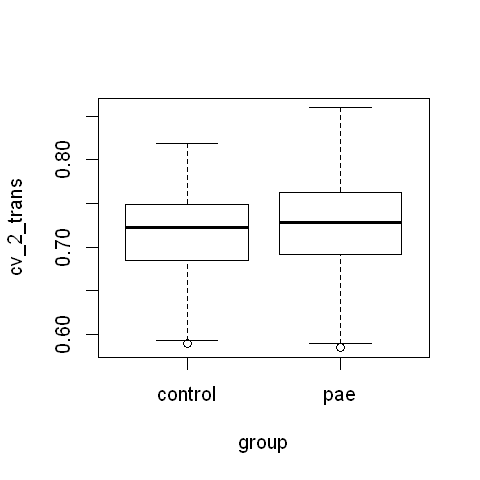

In [19]:
m1 = lm(cv_2 ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$cv_2_trans = data$cv_2^lambda

m1 = lmer(cv_2_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(cv_2_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(cv_2_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-4023.136,-4000.685,2015.568,-4031.136,NA,NA,NA
m1,5,-4022.008,-3993.943,2016.004,-4032.008,0.8714544,1,0.350553


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: cv_2_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
 -4022.0  -3993.9   2016.0  -4032.0     2019 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1650 -0.6694  0.0103  0.6286  3.4148 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0009423 0.03070 
 rat         (Intercept) 0.0016523 0.04065 
 Residual                0.0074410 0.08626 
Number of obs: 2024, groups:  session:rat, 120; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.41901    0.02085  7.66314  68.072  6.1e-12 ***
grouppae    -0.03132    0.03174  6.57517  -0.987    0.359    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.657

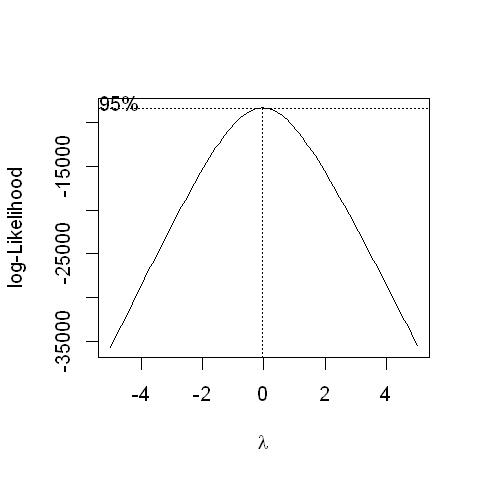

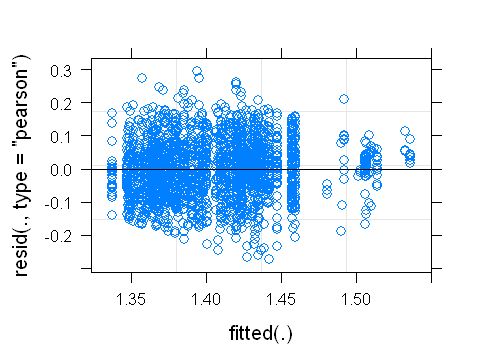

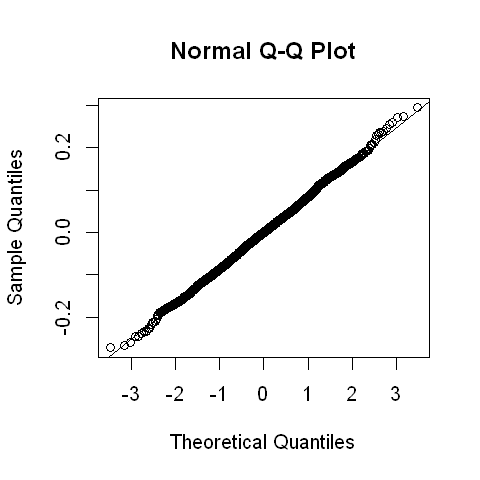

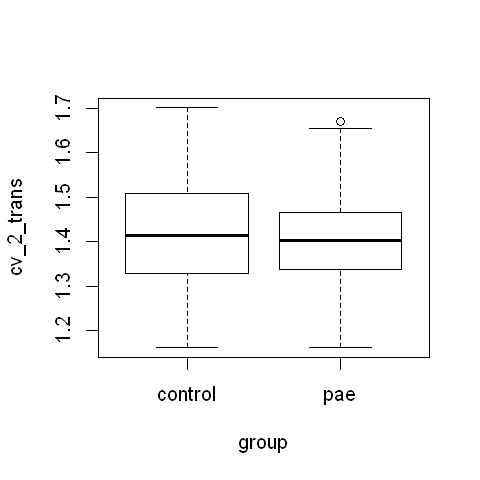

In [20]:
m1 = lm(cv_2 ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$cv_2_trans = data$cv_2^lambda

m1 = lmer(cv_2_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(cv_2_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(cv_2_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])

# spike width

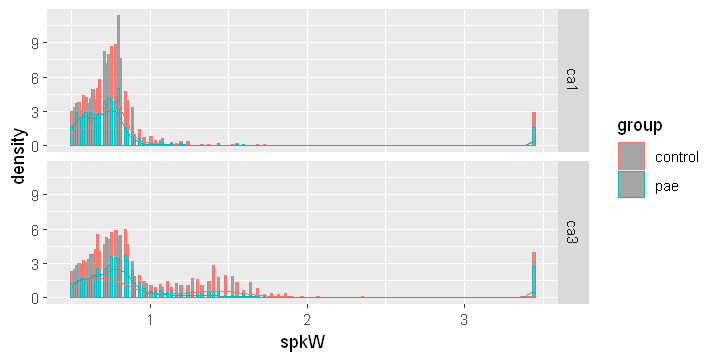

In [49]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data[data$cell_type == 'pyr',], aes(x=spkW, color=group)) +
    geom_histogram(aes(y=..density..),alpha=0.5,bins = 200) +
    geom_density() +
    facet_grid(area ~ .)
 

[1] 1.803753

[1] 2.433033

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,3166.016,3182.496,-1580.008,3160.016,NA,NA,NA
m1,4,3159.502,3181.475,-1575.751,3151.502,8.514591,1,0.003523101


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: spkW_trans ~ group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  3159.5   3181.5  -1575.8   3151.5     1792 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5996 -0.6160 -0.1429  0.6043  2.7054 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 0.0495   0.2225  
 Residual             0.3188   0.5646  
Number of obs: 1796, groups:  session, 91

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.73903    0.05098 66.12924  34.109  < 2e-16 ***
grouppae     0.18858    0.06231 66.21977   3.026  0.00352 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.818

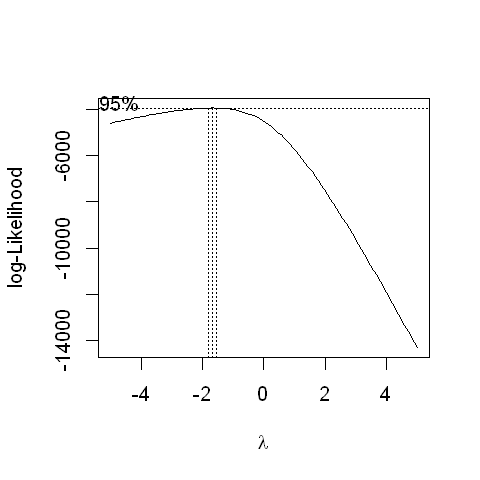

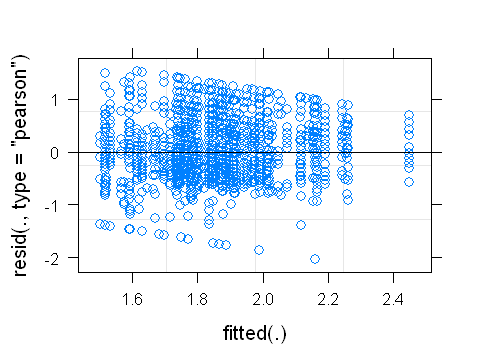

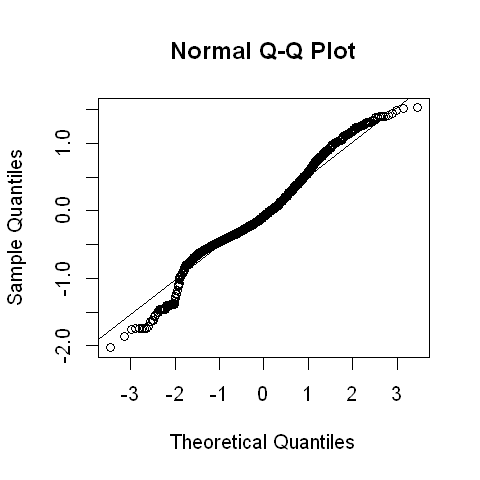

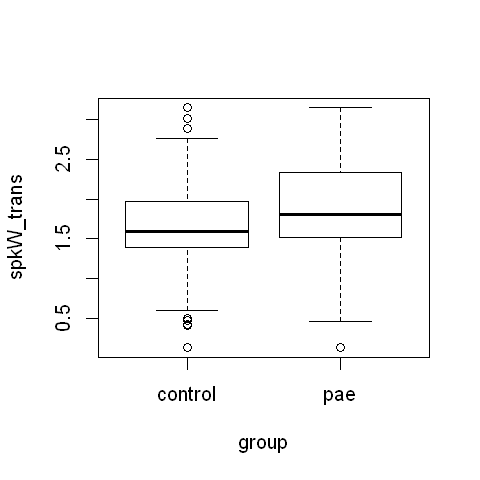

In [43]:


# data$burst_index_trans = (data$burst_index+2)

m1 = lm(spkW ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$spkW_trans = data$spkW^lambda

# data$spkW_trans = log(data$spkW)

median(data$spkW_trans[data$group=='control'])
median(data$spkW_trans[data$group=='pae'])

m1 = lmer(spkW_trans ~ group + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(spkW_trans ~ 1 + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(spkW_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'pyr',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,5321.547,5346.378,-2656.773,5313.547,NA,NA,NA
m1,5,5323.512,5354.550,-2656.756,5313.512,0.03480377,1,0.8520074


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: spkW_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  5323.5   5354.6  -2656.8   5313.5     3664 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0467 -0.5538 -0.1129  0.5524  3.5371 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.03452  0.1858  
 rat         (Intercept) 0.06620  0.2573  
 Residual                0.23523  0.4850  
Number of obs: 3669, groups:  session:rat, 126; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.51117    0.12510  9.11327  12.080  6.5e-07 ***
grouppae    -0.03656    0.19599  8.02535  -0.187    0.857    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.638

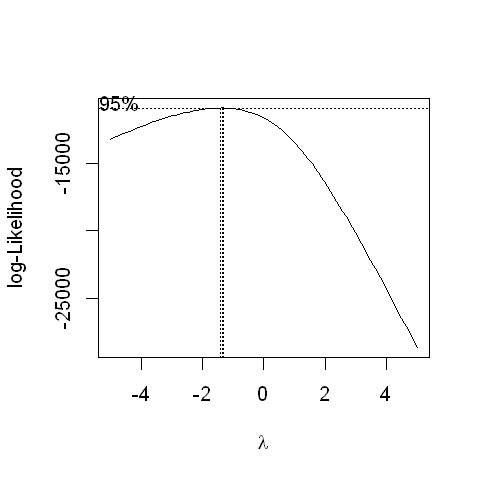

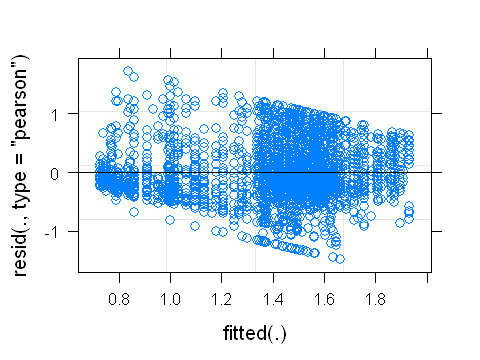

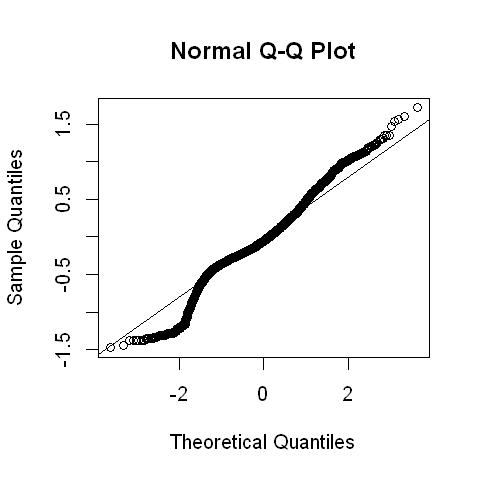

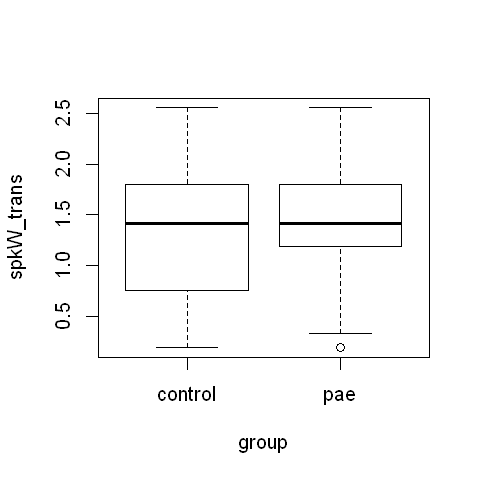

In [22]:
m1 = lm(spkW ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$spkW_trans = data$spkW^lambda


m1 = lmer(spkW_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',],REML=FALSE)
m1.null = lmer(spkW_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(spkW_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'pyr',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,2382.257,2397.291,-1188.129,2376.257,NA,NA,NA
m1,4,2382.064,2402.109,-1187.032,2374.064,2.193254,1,0.1386162


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: spkW_trans ~ group + (1 | session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  2382.1   2402.1  -1187.0   2374.1     1105 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6847 -0.7009 -0.0849  0.6175  2.9248 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 0.06682  0.2585  
 Residual             0.46467  0.6817  
Number of obs: 1109, groups:  session, 85

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  3.17870    0.07453 70.51381  42.650   <2e-16 ***
grouppae     0.12921    0.08693 69.63696   1.486    0.142    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.857

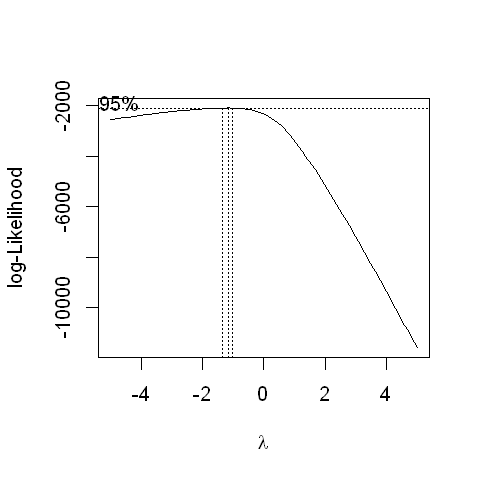

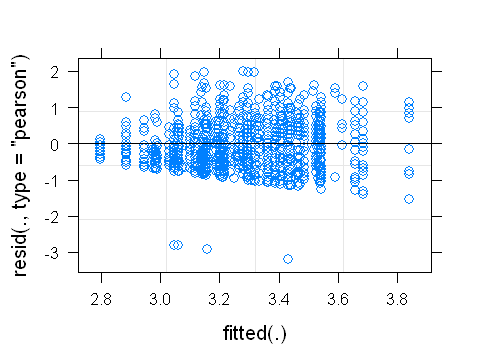

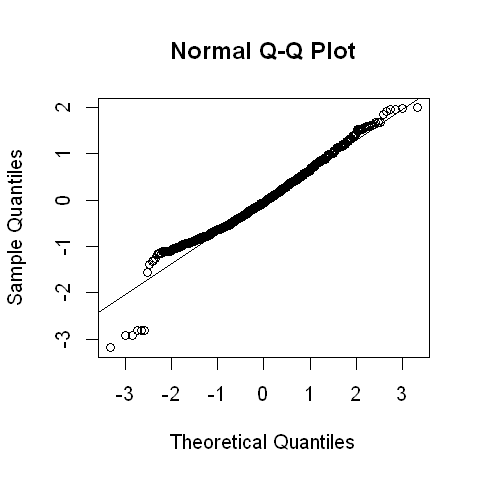

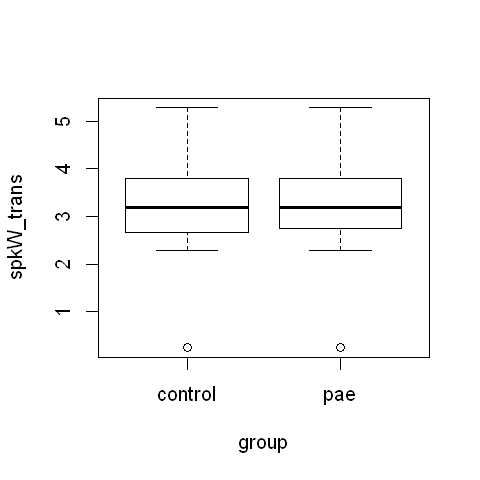

In [23]:
m1 = lm(spkW ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$spkW_trans = data$spkW^lambda


m1 = lmer(spkW_trans ~ group + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(spkW_trans ~ 1 + (1 | session), data = data[data$area == "ca1" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(spkW_trans ~ group, data = data[data$area == "ca1" & data$cell_type == 'int',])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,8186.332,8208.783,-4089.166,8178.332,NA,NA,NA
m1,5,8187.262,8215.326,-4088.631,8177.262,1.070123,1,0.3009177


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: spkW_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  8187.3   8215.3  -4088.6   8177.3     2019 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6061 -0.6247 -0.1605  0.5853  4.4382 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3007   0.5483  
 rat         (Intercept) 1.3855   1.1771  
 Residual                3.1201   1.7664  
Number of obs: 2024, groups:  session:rat, 120; rat, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   4.4502     0.5735 8.2058   7.759 4.73e-05 ***
grouppae      0.9720     0.8937 7.3113   1.088    0.311    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.642

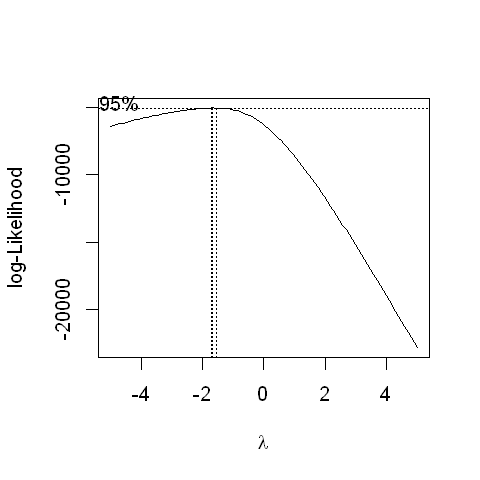

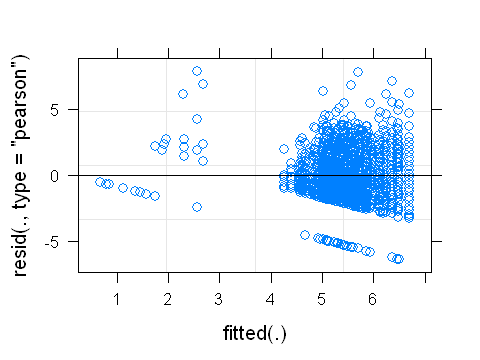

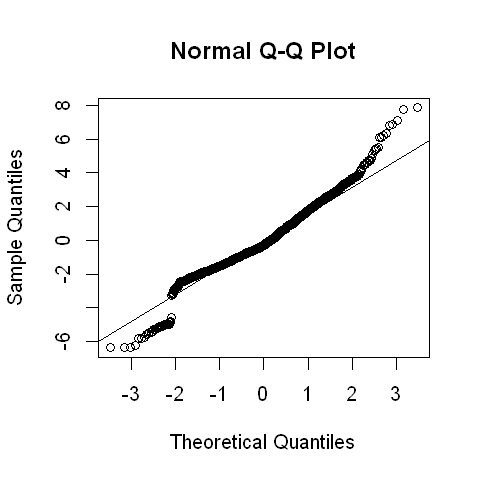

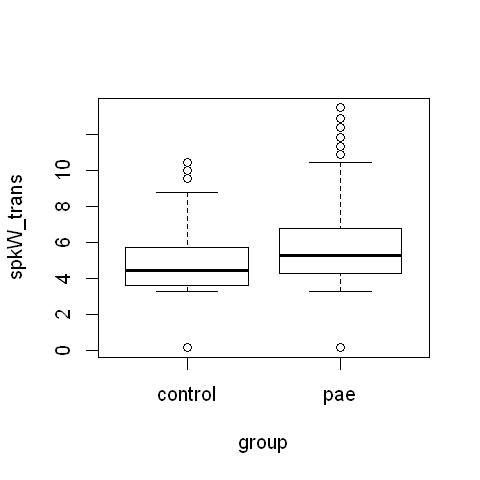

In [24]:
# data$spkW_trans = data$spkW + 1

m1 = lm(spkW ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$spkW_trans = data$spkW^lambda


m1 = lmer(spkW_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',],REML=FALSE)
m1.null = lmer(spkW_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type == 'int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(spkW_trans ~ group, data = data[data$area == "ca3" & data$cell_type == 'int',])